# Clustered data overview

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
import pandas as pd

CLUSTERED_DATA_DIR = 'data/combined/clustered/final'

In [3]:
STUDY = 'Galson_2015a'

In [4]:
# Parameters
STUDY = "Galson_2016"


In [5]:
data = pd.read_parquet(f'{CLUSTERED_DATA_DIR}/{STUDY}.parquet')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10598377 entries, 0 to 67
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Subject        object
 21  Species        object
 22  Vaccine        object
 23  Size           int64 
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 2.1+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Subject,Species,Vaccine,Size,cdr3_len,Cluster_ID
0,0,1,38802,SLRLSCAASGFTFSSYAMSWVRQAPGKGLEWVSVISGSGGSTYYAD...,IGHV3-23*01,AKDLAHYYDSSGYYYVLNNWFDP,106439,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096,23,33
1,0,1,95,SLRLSCAGSGFTFGSYAISWVRQVPGKGLEWVSSFAGRGSITYFAD...,IGHV3-23*01,ARVIERWPNCSGGNCYSGPWFDP,107933,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""G"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,34
2,0,1,428,SLRLSCAASGFTFSSFAMGWVRQAPGKGLEWVSSLSDGGGNRYYAD...,IGHV3-23*01,AKELGGGWFFGEVVSPRHNWFDP,122005,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,2
3,0,1,11277,SLRLSCAASGFTFSNYAMSWVRQAPGKGLEWVSTITDNGGSTYYAD...,IGHV3-23*01,AKDAHKPKTTYSGDQLLLGRFDP,117722,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,21
4,1,1,11579,SLRLSCAASGFTFSNYAMSWVRQAPGKGLEWVSTITDNGGSTYYAD...,IGHV3-23*01,AKDAHKPKTTYSGDQLLLGRFDP,130763,"[('94', 'R')]",IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,21


## Data overview

### Size

In [6]:
from bin.build_clustered_data import CLUSTER_ID_COLUMN_NAME

def size_overview(df):
    print(f'Total number of sequences: {df.shape[0]:,}')
    print(f'Total number of clusters: {df[CLUSTER_ID_COLUMN_NAME].nunique():,}')

In [7]:
size_overview(data)

Total number of sequences: 10,598,377
Total number of clusters: 1,682,432


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

CLUSTER_SIZE_COL_NAME = 'Number of sequences'
CLUSTER_SIZE_PLOT_TITLE = 'Cluster sizes (using log values)'
CLUSTER_SIZE_PLOT_YLABEL = 'Cluster size'
LARGEST_CLUSTERS_CNT = 10

def cluster_size_overview(df_cluster_sizes):
    df_log_cluster_sizes = np.log(df_cluster_sizes + 1)
    sorted_df_log_cluster_sizes = df_log_cluster_sizes.sort_values().reset_index(name=CLUSTER_SIZE_COL_NAME)

    # Largest clusters
    print(f'{LARGEST_CLUSTERS_CNT} largest cluster sizes:')
    print(df_cluster_sizes.sort_values().reset_index(name=CLUSTER_SIZE_COL_NAME).tail(LARGEST_CLUSTERS_CNT).iloc[::-1].to_string(index=False))

    # Distplot
    plt.figure(figsize=(10,6))
    ax = sns.distplot(df_log_cluster_sizes.values, bins=np.arange(df_log_cluster_sizes.min(), df_log_cluster_sizes.max() + 1), kde_kws={'bw': 1})
    ax.set(title=CLUSTER_SIZE_PLOT_TITLE + ' - distribution',
           xlabel= CLUSTER_SIZE_PLOT_YLABEL,
           xticklabels=['{:.2f}'.format(np.exp(v) - 1) for v in ax.get_xticks()])
    plt.show()
    
    # Areaplot
    ax = sorted_df_log_cluster_sizes[CLUSTER_SIZE_COL_NAME].plot.area(figsize=(10,6))
    ax.set(title=CLUSTER_SIZE_PLOT_TITLE, xlabel= 'Cluster', ylabel=CLUSTER_SIZE_PLOT_YLABEL, xticks=[],
           yticklabels=['{:.2f}'.format(np.exp(v) - 1) for v in ax.get_yticks()])

10 largest cluster sizes:
 Cluster_ID  Number of sequences
    1031266                29171
    1640315                27311
    1372828                17496
     784731                16723
    1300707                15335
     545078                13257
     199541                12714
     226927                10763
    1145132                10594
      78882                 9900


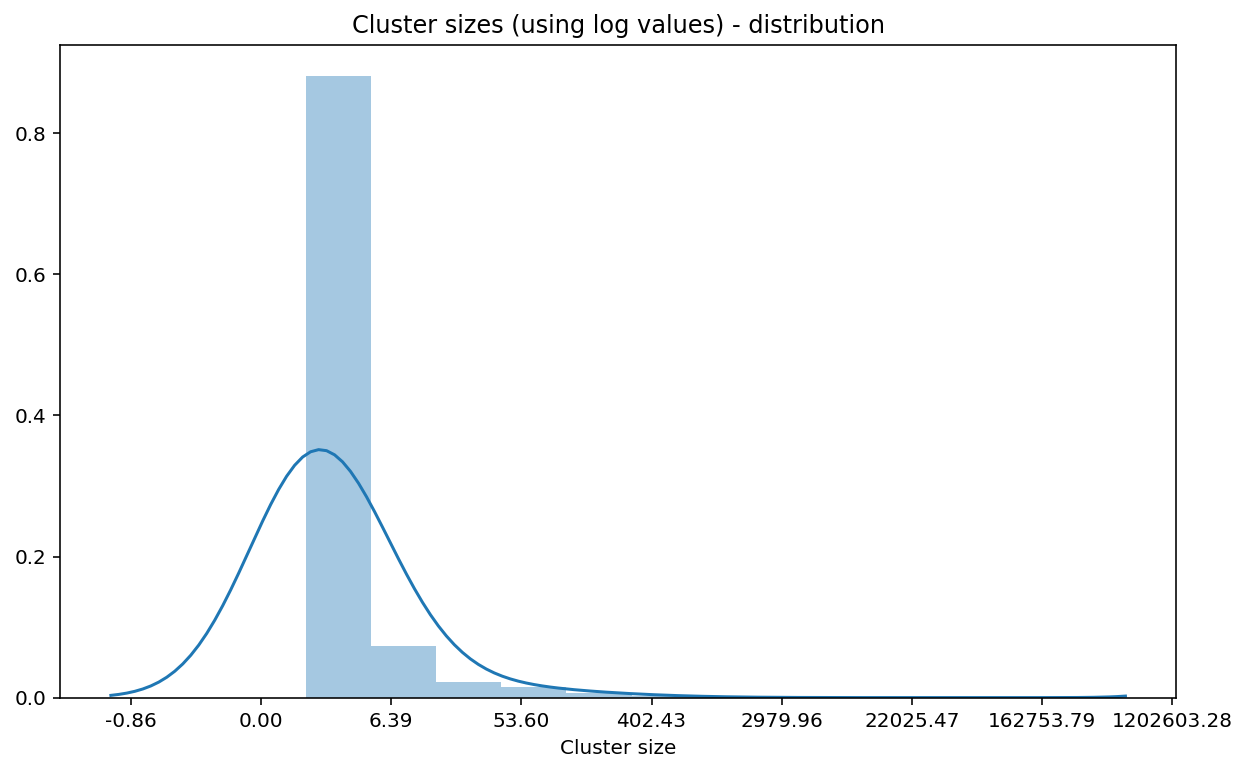

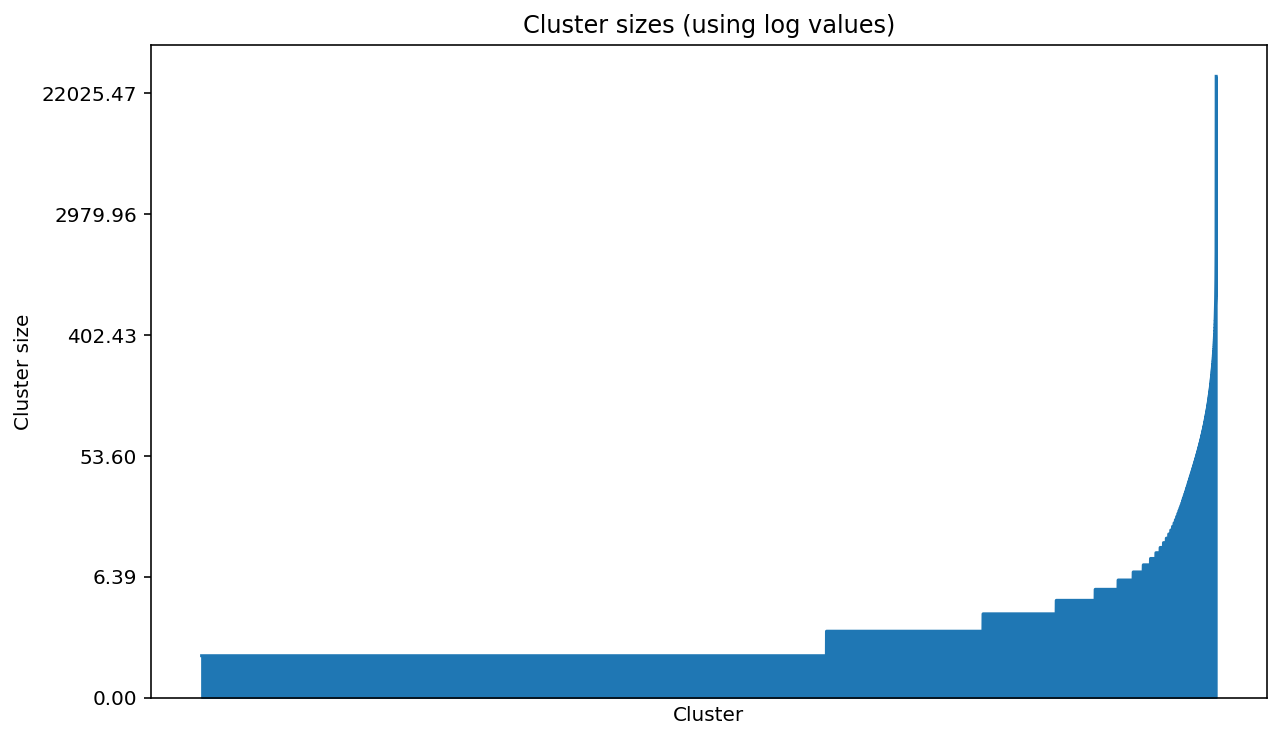

In [9]:
clusters_gr = data.groupby(CLUSTER_ID_COLUMN_NAME)
cluster_sizes = clusters_gr.size()
cluster_size_overview(cluster_sizes)

### Subject counts

In [10]:
cluster_subj_cnt = clusters_gr['Subject'].nunique()
cluster_subj_cnt

Cluster_ID
0          2
1          1
2          1
3          1
4          1
          ..
1682427    1
1682428    1
1682429    1
1682430    1
1682431    1
Name: Subject, Length: 1682432, dtype: int64

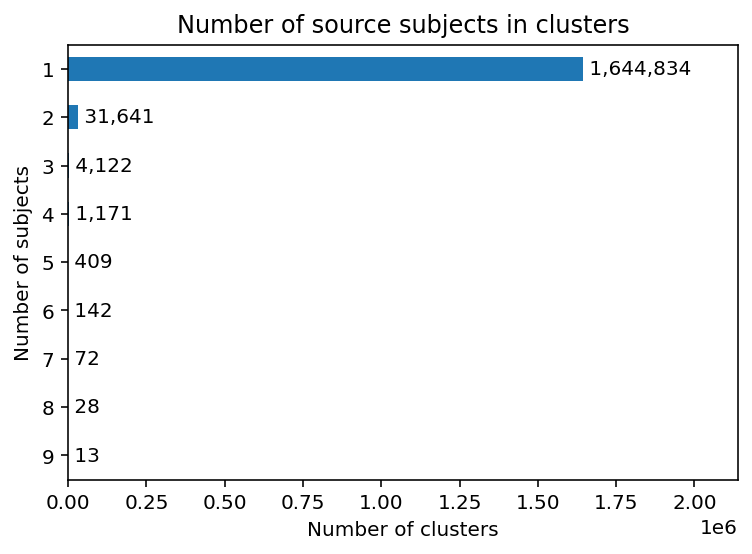

In [11]:
from bin.plotting import barplot

ax=barplot(cluster_subj_cnt.value_counts(), title='Number of source subjects in clusters')
ax.set(ylabel='Number of subjects', xlabel='Number of clusters');

### CDR3 logos of the largest clusters

In [12]:
HEBP_TYPE = 'HepB+B-cells'

clusters_specif = clusters_gr.apply(lambda gr: (gr['BType'] == HEBP_TYPE).sum() / len(gr))

In [13]:
import matplotlib.pyplot as plt
import logomaker as lm
import math

LOGOS_CLUSTER_CNT = 10
NCOLS = 2
HEP_B_RATIO_THRESHOLD = 0.5

def cdr3_logos(cluster_ids, mark_hepb=False):
    nrows = math.ceil(len(cluster_ids) / NCOLS)
    
    fig, axs = plt.subplots(nrows, NCOLS, figsize=(10, 8))
    
    for cluster_id, ax in zip(cluster_ids, axs.flat):
        cluster_data = data[data[CLUSTER_ID_COLUMN_NAME] == cluster_id]
        cluster_cdr3_sequences = cluster_data['cdr3'].values
        
        counts_mat = lm.alignment_to_matrix(cluster_cdr3_sequences)

        logo = lm.Logo(counts_mat, color_scheme='chemistry', ax=ax)
        subjects_cnt = len(cluster_data.groupby(['Author', 'Subject']))
        
        title = f'CDR3 - cluster {cluster_id}. Size={cluster_sizes[cluster_id]:,}\nHepB_spec.={"{:.3f}".format(clusters_specif[cluster_id])} - from {subjects_cnt} subjects'
        fontweight = 'bold' if mark_hepb and clusters_specif[cluster_id] > HEP_B_RATIO_THRESHOLD else 'normal'

        ax.set_title(title, fontweight=fontweight)

    fig.tight_layout()

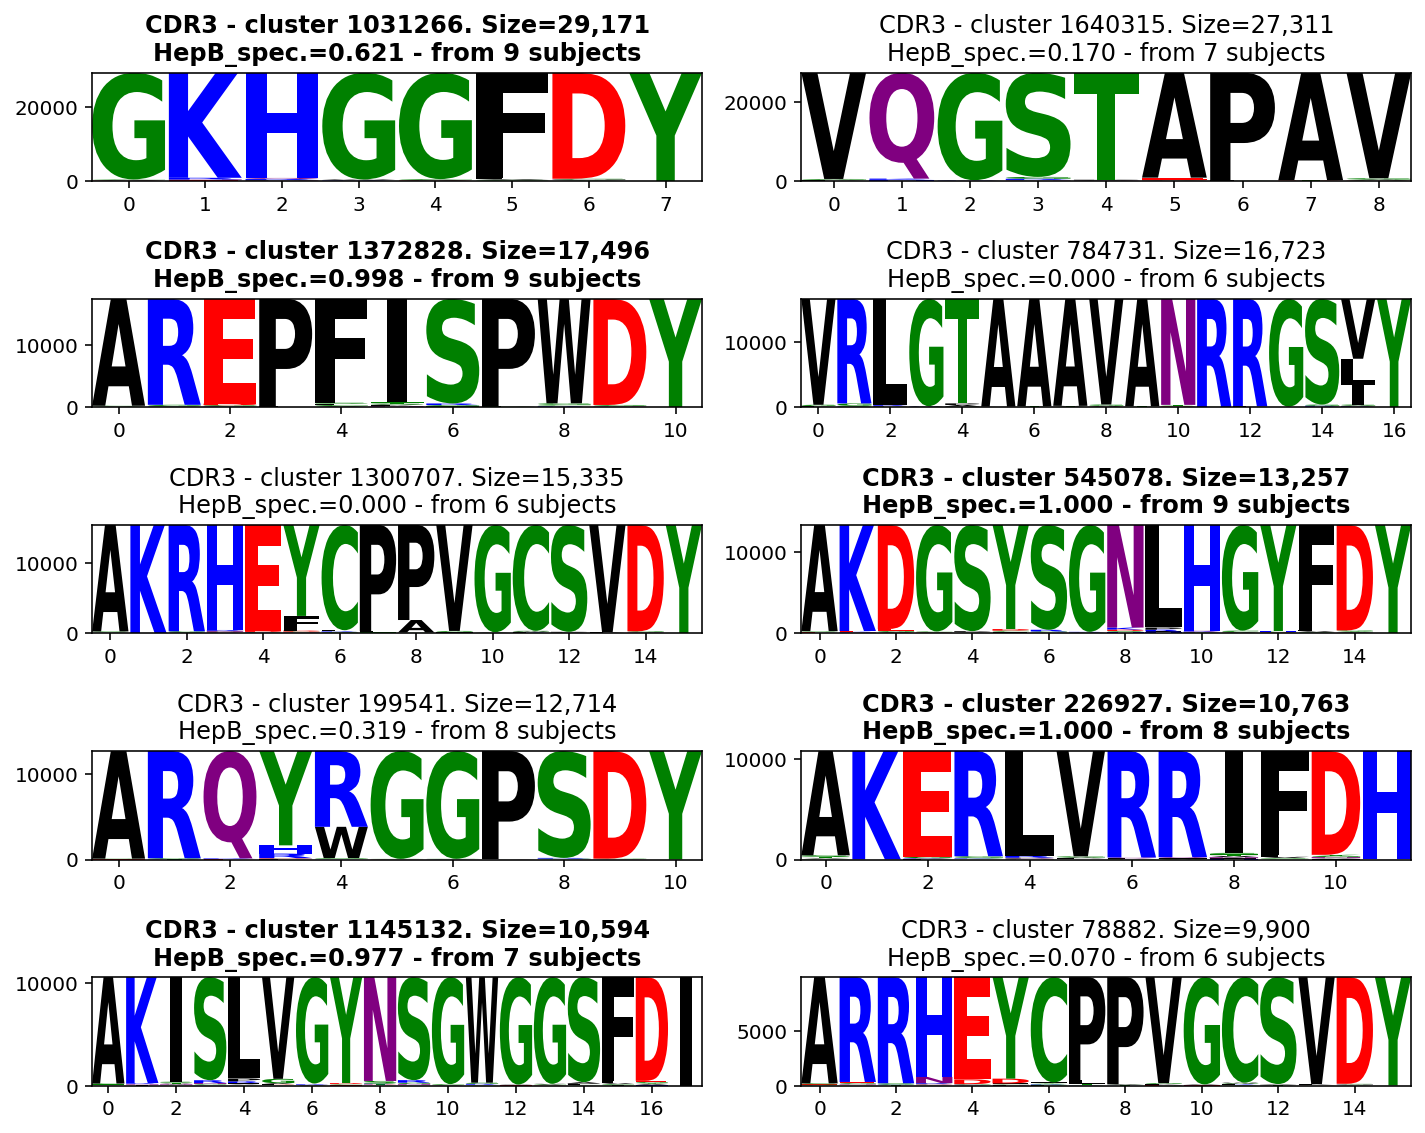

In [14]:
largest_clusters = cluster_sizes.sort_values(ascending=False).head(LOGOS_CLUSTER_CNT).index.to_list()
cdr3_logos(largest_clusters, mark_hepb=True)

### CDR3 logos of the clusters with most subjects

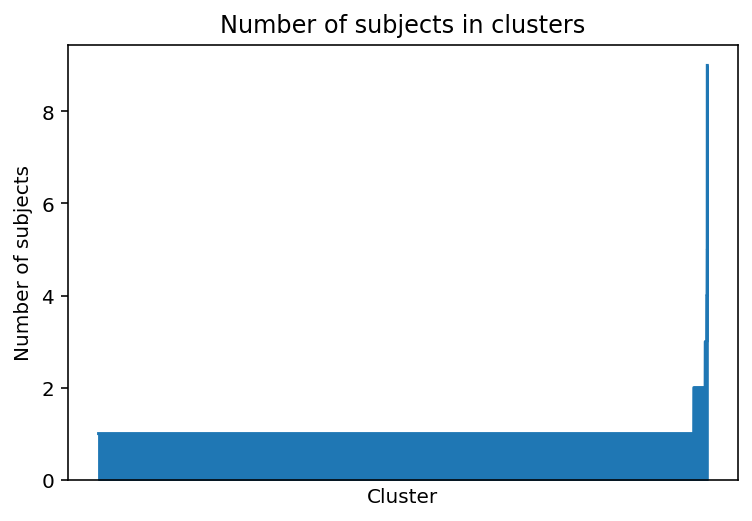

In [15]:
clusters_sorted_subj = cluster_subj_cnt.sort_values()

ax = clusters_sorted_subj.reset_index(drop=True).plot.area()
ax.set(title='Number of subjects in clusters', xlabel='Cluster', ylabel='Number of subjects', xticks=[]);

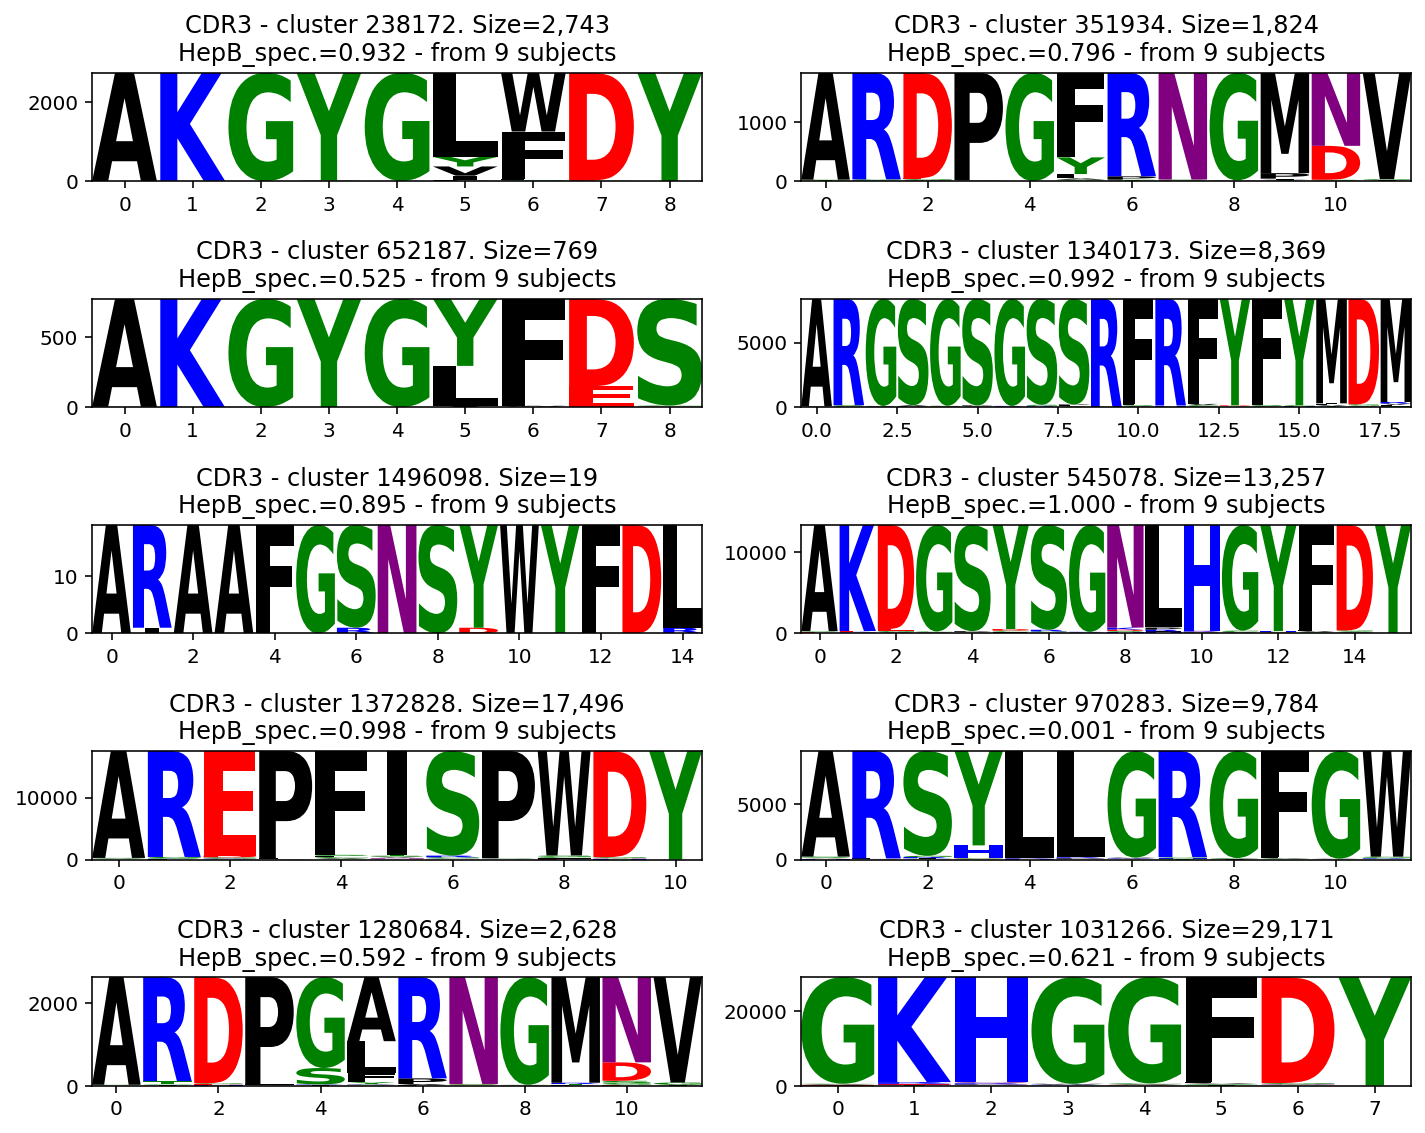

In [16]:
cdr3_logos(clusters_sorted_subj.tail(LOGOS_CLUSTER_CNT).index)

## HepB data overview

### HepB ratio

In [17]:
RATIO_SIZE_TITLE = 'Cluster HepB ratio'

def cluster_hepb_ratio_overview(specif):
    sorted_specif = specif.sort_values()

    ax = sorted_specif.reset_index().iloc[:,1].plot.area()
    ax.set(title=RATIO_SIZE_TITLE, xlabel='Cluster', ylabel='HepB ratio' , xticks=[])
    plt.show()

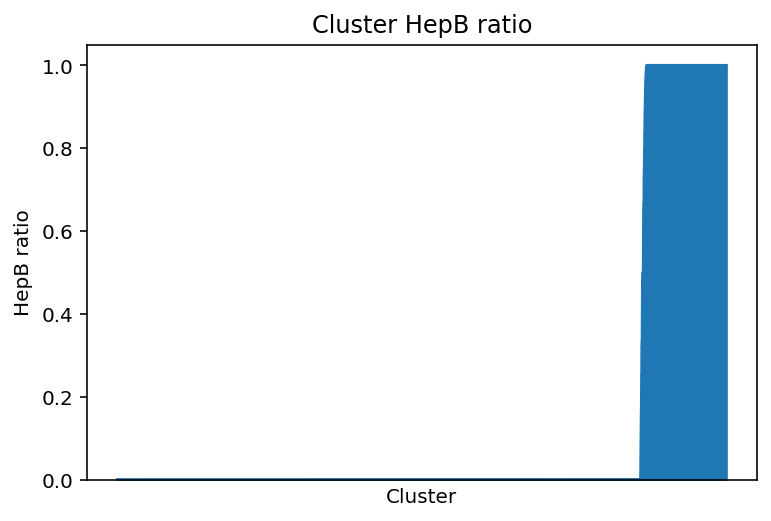

In [18]:
cluster_hepb_ratio_overview(clusters_specif)

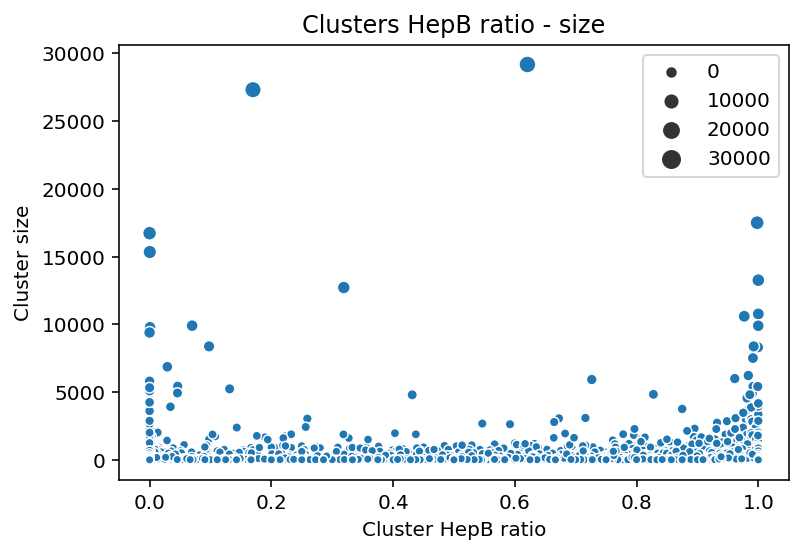

In [19]:
ax = sns.scatterplot(x=clusters_specif, y=cluster_sizes, size=cluster_sizes)
ax.set(title='Clusters HepB ratio - size', xlabel='Cluster HepB ratio', ylabel='Cluster size')
plt.show()

### HepB data

In [20]:
hepb_clusters_ids = clusters_specif[clusters_specif > HEP_B_RATIO_THRESHOLD].index.to_list()

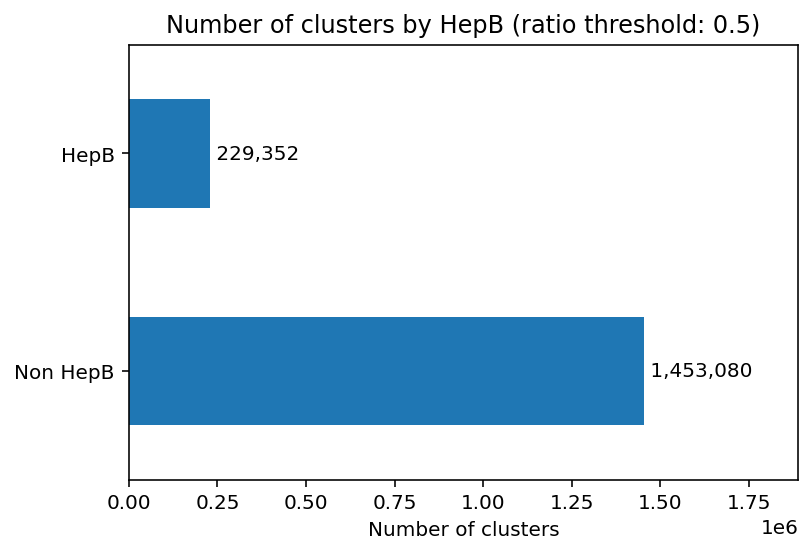

In [21]:
cluster_sizes_by_hepb = pd.Series([len(hepb_clusters_ids), len(clusters_specif) - len(hepb_clusters_ids)], index=['HepB', 'Non HepB'])
ax = barplot(cluster_sizes_by_hepb, title=f'Number of clusters by HepB (ratio threshold: {HEP_B_RATIO_THRESHOLD})');
ax.set(xlabel='Number of clusters');

### HepB cluster sizes

10 largest cluster sizes:
 Cluster_ID  Number of sequences
    1031266                29171
    1372828                17496
     545078                13257
     226927                10763
    1145132                10594
     392025                 9893
    1340173                 8369
     994479                 8309
     703460                 7511
    1616587                 6222


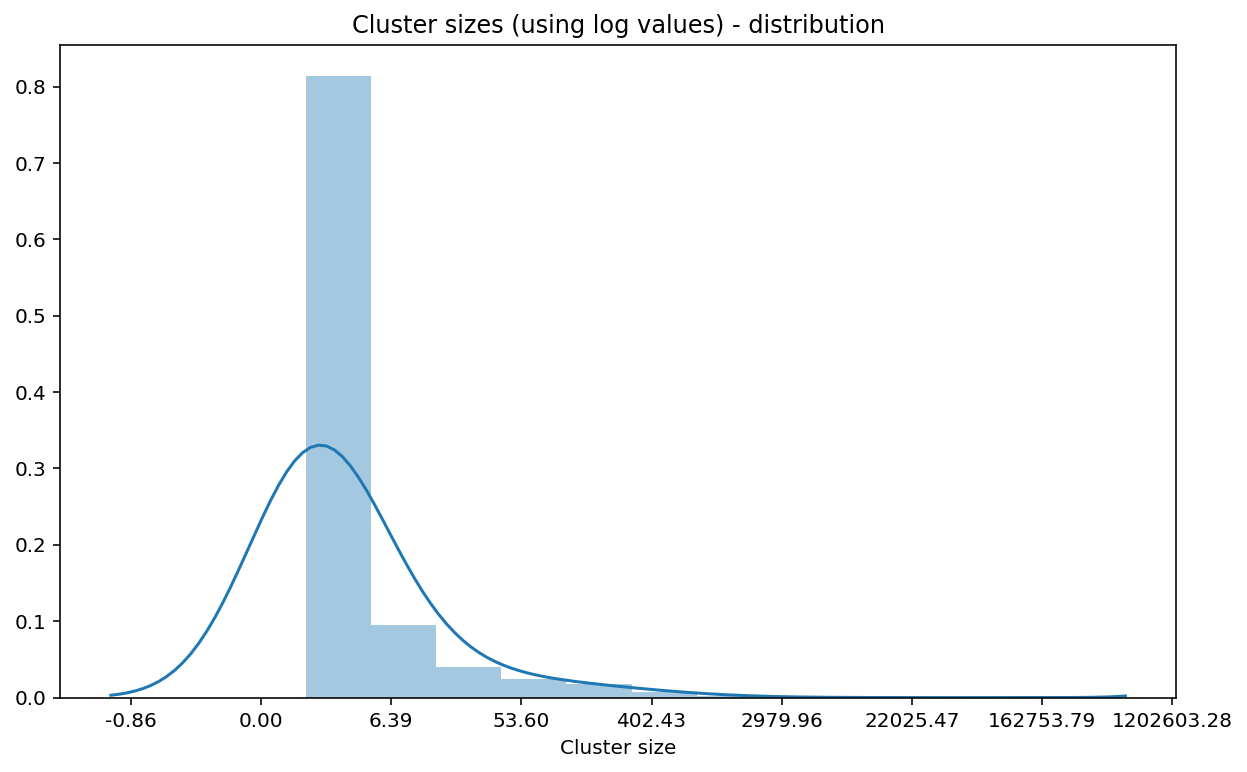

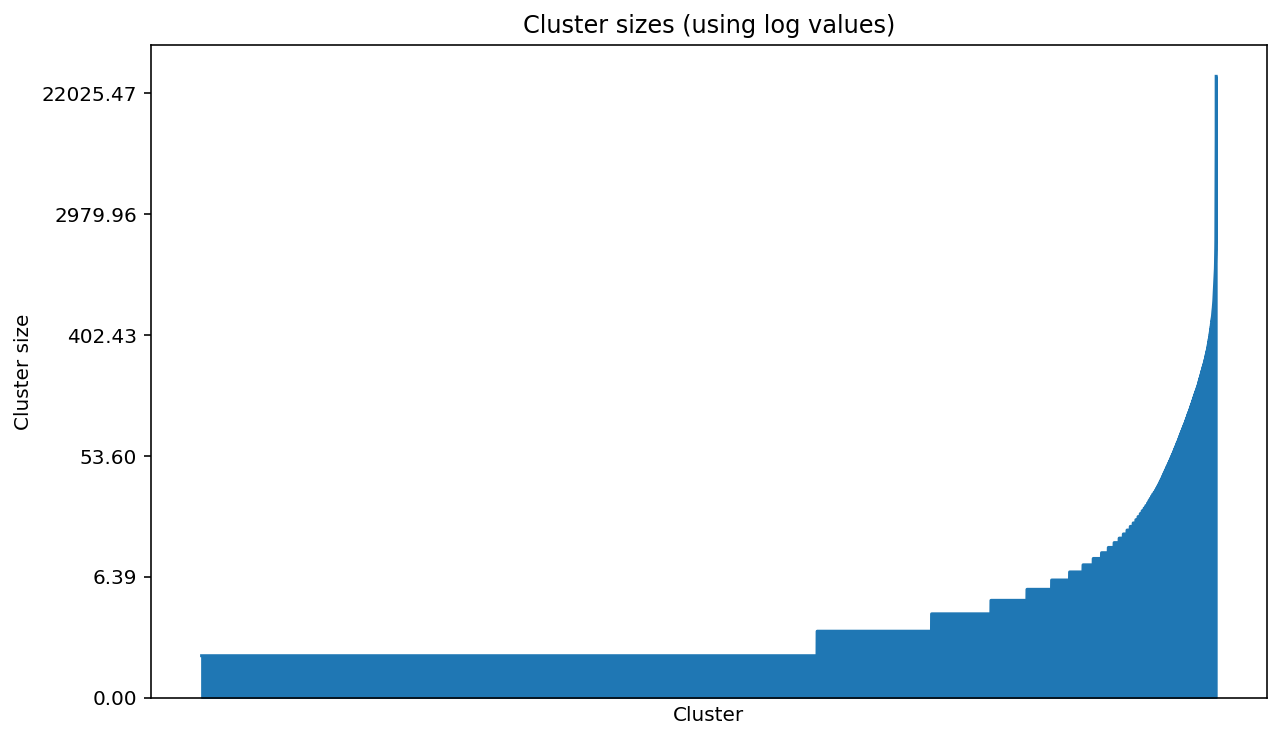

In [22]:
cluster_size_overview(cluster_sizes[hepb_clusters_ids])

### HepB subject counts

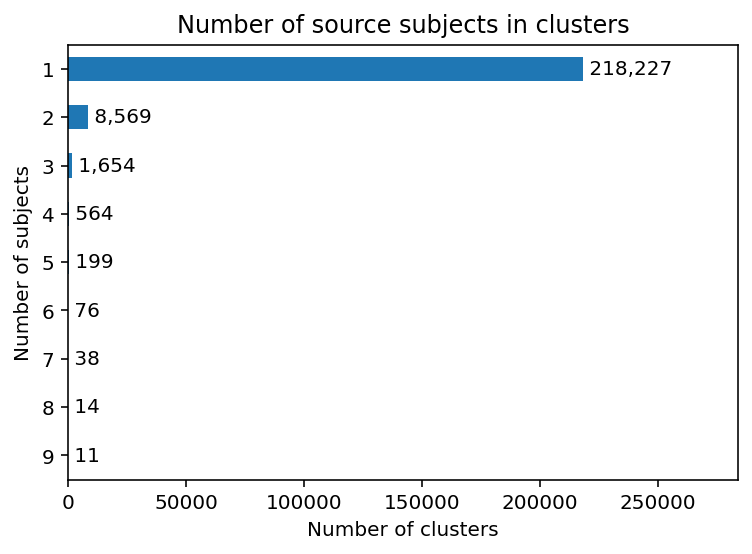

In [23]:
ax=barplot(cluster_subj_cnt.iloc[hepb_clusters_ids].value_counts(), title='Number of source subjects in clusters')
ax.set(ylabel='Number of subjects', xlabel='Number of clusters');

### HepB CDR3 logos

In [24]:
hepb_clusters_df = pd.DataFrame({
    'Size': cluster_sizes,
    'HepB ratio': clusters_specif,
    'HepB seq. count': clusters_specif * cluster_sizes
})

sorted_hepb_clusters_df = hepb_clusters_df.sort_values(by='HepB seq. count', ascending=False)
sorted_hepb_clusters_df.head(10)

,Size,HepB ratio,HepB seq. count
Cluster_ID,,,
1031266,29171,0.620719,18107.0
1372828,17496,0.998057,17462.0
545078,13257,1.000000,13257.0
226927,10763,1.000000,10763.0
1145132,10594,0.976874,10349.0
392025,9893,0.999899,9892.0
994479,8309,0.999519,8305.0
1340173,8369,0.992353,8305.0
703460,7511,0.991213,7445.0


In [25]:
HEP_B_RATIO_THRESHOLD = 0.95

best_hepb_clusters = sorted_hepb_clusters_df[sorted_hepb_clusters_df['HepB ratio'] > HEP_B_RATIO_THRESHOLD].head(LOGOS_CLUSTER_CNT)
best_hepb_clusters

,Size,HepB ratio,HepB seq. count
Cluster_ID,,,
1372828,17496,0.998057,17462.0
545078,13257,1.000000,13257.0
226927,10763,1.000000,10763.0
1145132,10594,0.976874,10349.0
392025,9893,0.999899,9892.0
994479,8309,0.999519,8305.0
1340173,8369,0.992353,8305.0
703460,7511,0.991213,7445.0
1616587,6222,0.983607,6120.0


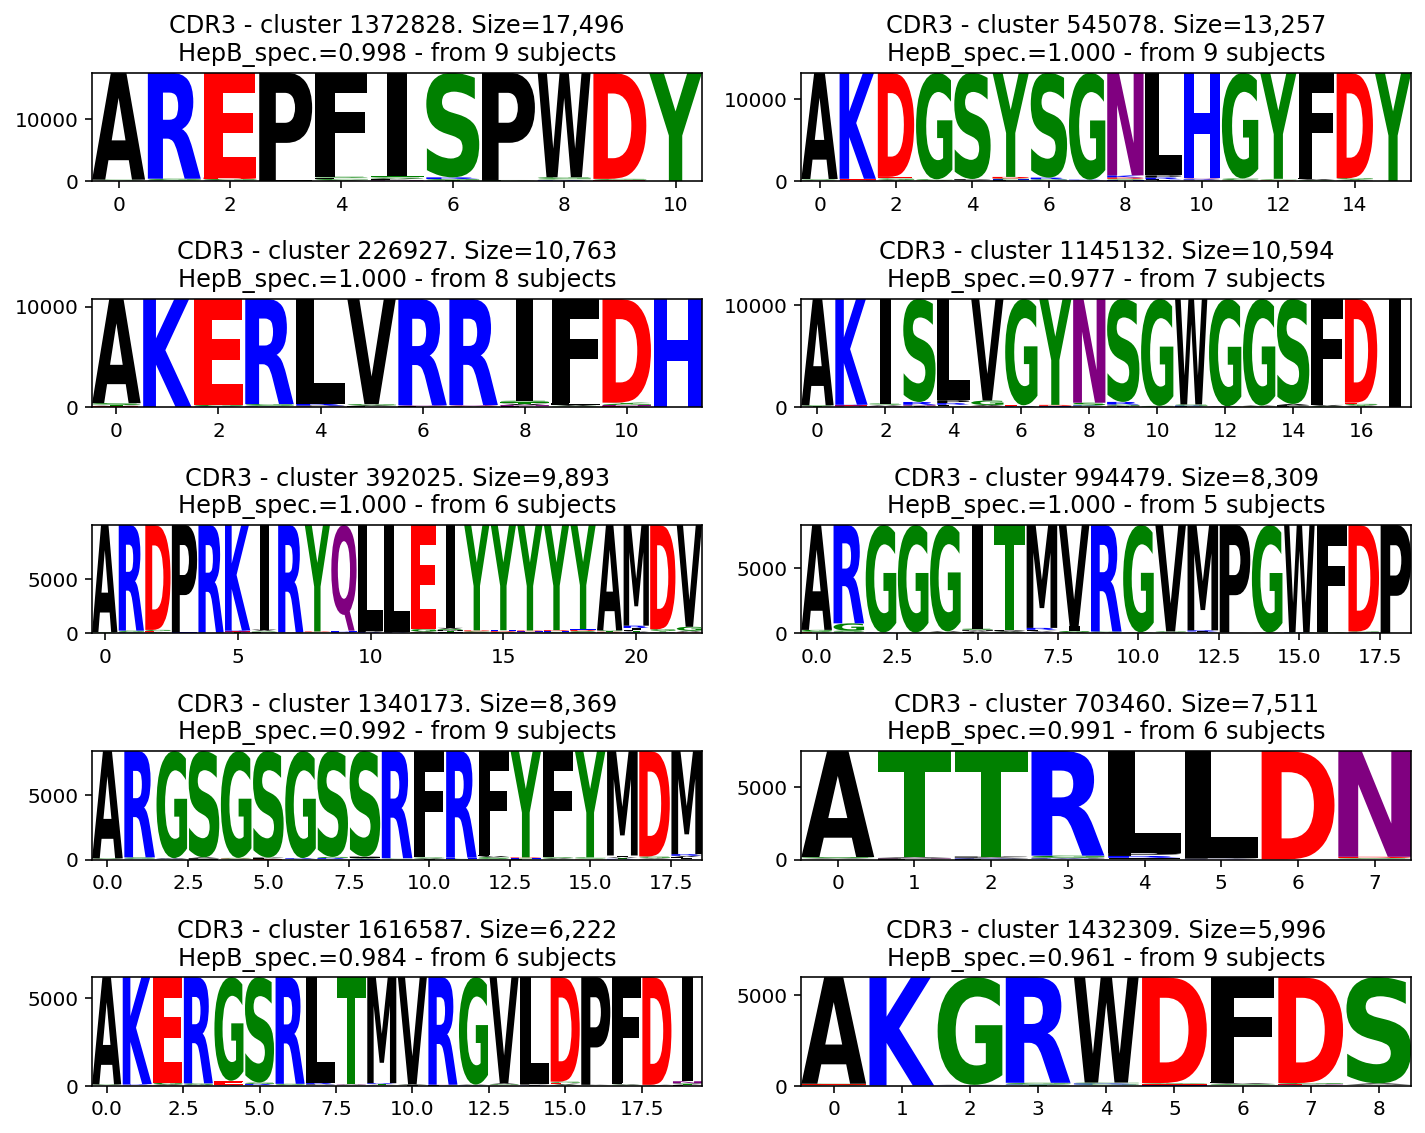

In [26]:
cdr3_logos(best_hepb_clusters.index)